##### Copyright 2020 HRFlow's AI Research Department

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2020 HRFlow's AI Research Department. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Job API:

This notebook illustrates how to use **HRFlow's Job API**. This API serves as an interface to upload jobs (either structured as a json or as a file located in your hard drive) and retrieve results from HRFlow. In the current version, the following results can be retrieved or used:
* The **parsed resume** 
* Any **attachments** that have been sent in an upload
* The **embeddings** at various degree of granularity

An **example of applications** with the Job API is available below. The example shows how **embeddings** can be leveraged to **classify jobs**. 

**Embeddings** eases the management of documents like resumes of jobs. It turns any highly structured image of a resume into a single **vector of numbers** with fixed length. 

The document embeddings can also be trivially used to compute **job or profile level meaning similarity** as well as to enable better performance on downstream classification tasks using **less supervised training data**.


**Disclaimer**: Jobs comes from [pole-emploi.fr](https://www.pole-emploi.fr) 

<p>
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/Riminder/python-hrflow-api/blob/master/examples/colab/hrflow_job_api.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/Riminder/python-hrflow-api/blob/master/examples/colab/hrflow_job_api.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td><td>
  <a target="_blank"  href="https://www.hrflow.ai/book-us">
    <img width=32px src="https://gblobscdn.gitbook.com/spaces%2F-M1L6Hspq8r9LXd5_gIC%2Favatar-1586188377926.png?generation=1586188378327930&alt=media" />Get an account</a>
</td></table>
<br>
</p>

# Getting Started
This section sets up the environment to get access to **HRFlow Job API** and sets up a connection to HRFlow.

In [2]:
# Machine Learning and Classification Libs
!pip install --quiet tensorflow
!pip install --quiet matplotlib
!pip install --quiet pandas
!pip install --quiet seaborn
!pip install --quiet plotly

# HRFlow Dependencies
!apt-get install libmagic-dev
!pip install --quiet python-magic
!pip install --quiet hrflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-dev libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 332 kB of archives.
After this operation, 5,549 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.3 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.3 [68.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-dev amd64 1:5.32-2ubuntu0.3 [79.5 kB]
Fetched 332 kB in 1s (487 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.3_a

In [3]:
import os
import pickle
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
ROOT_PATH = "drive/My Drive/Data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


An **API Key** is required here. You can get your API Key at **https://```<your-sub domain/>```.hrflow.ai/settings/api/keys** or ask us for a **demo API Key**.

Either add your API Key as a file in your 'ROOT_PATH' or set the python variable named api_secret to your  API Key (api_secret = 'YOUR_SECRET_API_KEY')

In [0]:
import pprint
import hrflow as hf

with open(os.path.join(ROOT_PATH,'api_key'), 'rb') as file:
  api_secret = pickle.load(file)

client = hf.Client(api_secret=api_secret)

# 1. Job API Routes

There is currently 4 routes for this API:
*  **Upload**: Uploading a job by specifying some informations. The job will be stored as a JSON file in HRFlow
*  **Parsing**: Retrieve job's parsing.
*  **Embedding**: Retrieve your jobs **Embeddings** to build your custom solution
*  **searching** Retrieve a list of Job based on filters

## 1.1. Upload Json

In [9]:
response = client.job.add_json(name="data engineer", 
                               agent_id="a5dde54d7aa9a2ce6d3b11250aaa139cda3c9add",
                               job_reference="test_ref1",
                               title="Data engineer", 
                               description="This job is made for you")
pprint.pprint(response)

{'code': 201,
 'data': {'agent': {'agent_id': 'a5dde54d7aa9a2ce6d3b11250aaa139cda3c9add',
                    'description': None,
                    'name': 'General Model',
                    'timestamp': {'date': '2020-03-24 14:07:36.000000',
                                  'timezone': 'UTC',
                                  'timezone_type': 3}},
          'archive': False,
          'date_creation': {'date': '2020-04-17 12:30:56.946472',
                            'timezone': 'UTC',
                            'timezone_type': 3},
          'description': 'This job is made for you',
          'job_id': '399329b780feda71db57957d24ec9ee87d3b55a9',
          'job_reference': 'test_ref1',
          'name': 'data engineer',
          'notification': False,
          'query': {'educations_duration_max': 100,
                    'educations_duration_min': -1,
                    'experiences_duration_max': 100,
                    'experiences_duration_min': -1,
                    

## 1.2. Get Parsed Document

The method client.job.parsing.get retrieves the informations of a given job. It uses one mandatory field: **job_id**. The job_id is returned as part of a response's upload.

In [11]:
response = client.job.parsing.get(job_id='399329b780feda71db57957d24ec9ee87d3b55a9')
pprint.pprint(response)

{'code': 200,
 'data': {'agent': {'agent_id': 'a5dde54d7aa9a2ce6d3b11250aaa139cda3c9add',
                    'description': None,
                    'name': 'General Model',
                    'timestamp': {'date': '2020-03-24 14:07:36.000000',
                                  'timezone': 'UTC',
                                  'timezone_type': 3}},
          'archive': False,
          'date_creation': {'date': '2020-04-17 12:30:56.000000',
                            'timezone': 'UTC',
                            'timezone_type': 3},
          'description': 'This job is made for you',
          'job_id': '399329b780feda71db57957d24ec9ee87d3b55a9',
          'job_reference': 'test_ref1',
          'name': 'data engineer',
          'notification': False,
          'query': {'educations_duration_max': 100,
                    'educations_duration_min': -1,
                    'experiences_duration_max': 100,
                    'experiences_duration_min': -1,
                    

## 1.3. Embeddings Retrieval

client.job.embedding.get returns embeddings for a given job (uniquely defined by the pair **source_id** and **job_id**). 

This methods presently handles only job per job embeddings. A loop is required to get embeddings for more than one job.

In [12]:
response = client.job.embedding.get(job_id="399329b780feda71db57957d24ec9ee87d3b55a9")
pprint.pprint(response)

{'code': 200,
 'data': 'https://riminder-documents-eu-2019-12.s3.eu-west-1.amazonaws.com/teams/d57948095e4a842ff5436480f382f4b527b94a09/boards/undefined/jobs/399329b780feda71db57957d24ec9ee87d3b55a9/embedding/job.hflw?X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKT%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCWV1LXdlc3QtMSJHMEUCIGahWVmeU%2FCwl11c9KFYT1KNzOk%2FsS6LhHs0FLPcMeOrAiEA3VB90wJfw29xlYXHGidXj0cgOTldT1QQOTnEL6JdhNwqvQMIvf%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgwwMDgzNjMxMjk0NzUiDNF%2F4V2QDyzaSKC3fiqRAzCmVRzFiVvG5b3Mt6lzJOgsb9a%2F8ABRbUjlh3QiU6L28LbnW5OTx0gWlcJZ%2BLY6fKGKcKuT6mYOqWEXei8xKSvM9Os9vPbzIdPNbxlJgdIRDKFvq0riE%2Fb2cirZVRaMMHJcwVQF4CH7J12%2BigiEPug13AgzpHdDZgi3lhTGuFk5KYrskYYod1n3hTbaEG1Oos7zKb1Qft1iIe2H4aa0KsLtXwlonFbzQN%2B4JqI4xJnH%2BGHPRY3CXt5eyQ9Xhyht5K8SLgf0y5pZ0dy7SqmSd2jl3YoqhcO%2BFRB4XbRN0KZbPwaKbpybIMBazfhCVCY5xxVzCVA4fAi8Y9L%2FmN8NwcF6gm5pAFxwb0I6wcbzk%2BbTaTk%2Br2mieX%2BcsXBrTNd10qMalRYEBGAVCaIubQtAFlrtgoHQWn6uV87hs8aojCC%2BjlvGixAesMg4eCQmVFWp6

## 1.4. Advanced Tools

### Job Search Engine

client.job.searching searches jobs based on their **name**

In [13]:
response = client.job.searching.get()
pprint.pprint(response)

{'code': 200,
 'count': 19,
 'data': [{'agent': [],
           'archive': False,
           'date_creation': {'date': '2019-02-05 16:59:04.000000',
                             'timezone': 'UTC',
                             'timezone_type': 3},
           'description': '',
           'job_id': '09e2e17d06266e6d299d7783bb61565e12d250ed',
           'job_reference': 'tesgeotetzettqseg',
           'name': 'Neutral new test dawg',
           'notification': False,
           'query': {'educations_duration_max': 100000000000,
                     'educations_duration_min': -100000000000,
                     'experiences_duration_max': 100000000000,
                     'experiences_duration_min': -100000000000,
                     'is_edu_geo_loc': True,
                     'is_exp_geo_loc': False,
                     'is_geo_loc': False,
                     'location_lat': 34.0361152,
                     'location_lng': -6.7480954,
                     'radius': 10000,
           

# 2. Machine Learning With Embeddings

Embeddings is widely used these last years (2013 onwards) in the field of *Natural Language Processing*, thanks to Tomas Mikolov and his team at Google. Their breakthrough on building reliable embeddings for words had a huge impact both scientifically and technologically.

The rough idea behind embeddings consists in **numerically capture the meaning or informations** of a word (or sentence or even a whole document like a resume). Any resume can thus be relatively accurately represented by a set of real numbers ('vector of floats'). The **measure of accuracy** is evaluated to a predefined task. 

An embedding algorithm is deemed to be 'good' as for being good for a given **evaluation task**. In the case of word embeddings, the latter can be trained and evaluated (on the same task) on filling sentences gaps. This task quantifies how an embedding algorithm performs at knowing a sentence context (sequence words in the sentence) by filling missing words.

In our case, the most obvious, practical and meaningfull evaluation task is the **classification of jobs** (which ones are 'bakers', 'data scientists', etc). This task is usually quite easily done by humans (Human Resources departments) and relatively well done by computers (keywords).

The following cells of this notebook shows a relatively simple model that classifies some type of jobs based on pole emploi jobs (HRFlow Crawling Pipeline Feature). 

In [0]:
import requests
import shutil
import numpy as np

def load_embedding(url):
  response = requests.get(url, stream=True)
  with open('tmp', 'wb') as file:
      shutil.copyfileobj(response.raw, file)
  return np.load('tmp', allow_pickle=True)

## 2.1. Embeddings Retrieval

We advise, in the case of retrieving a great amount of embeddings, to get embeddings asynchronously.

The next colab cell download some embeddings knowing a list of **job_id**. Extra information for the given jobs have been saved in a file named **job_types** (the pole emploi job_type associated to the job_id). The embeddings, the job description and title and the job types are saved to the hard disk for later usages.

In [0]:
# Loading From HRFlow
from tqdm import tqdm

with open(os.path.join(ROOT_PATH, 'jobs_ids'), 'rb') as file:
  jobs_ids = pickle.load(file)
with open(os.path.join(ROOT_PATH, 'jobs_types'), 'rb') as file:
  jobs_types = pickle.load(file)
jobs_texts = []
jobs_embeddings = []

for job_id in tqdm(jobs_ids):
  # Get Embedding
  response = client.job.embedding.get(job_id=job_id)
  jobs_embeddings.append(load_embedding(response['data']))
  # Get Job Informations
  response = client.job.parsing.get(job_id=job_id)
  job_text = {'title': response['data']['name'], 
              'description': response['data']['description']}
  jobs_texts.append(job_text)

# Save Data To Disk
with open(os.path.join(ROOT_PATH, 'jobs_embeddings'), 'wb') as file:
  pickle.dump(jobs_embeddings, file) 
with open(os.path.join(ROOT_PATH, 'jobs_texts'), 'wb') as file:
  pickle.dump(jobs_texts, file) 
with open(os.path.join(ROOT_PATH, 'jobs_types'), 'wb') as file:
  pickle.dump(jobs_types, file) 

In [0]:
# Loading From Disk
with open(os.path.join(ROOT_PATH, 'jobs_embeddings'), 'rb') as file:
  jobs_embeddings = pickle.load(file) 
with open(os.path.join(ROOT_PATH, 'jobs_texts'), 'rb') as file:
  jobs_texts = pickle.load(file) 
with open(os.path.join(ROOT_PATH, 'jobs_types'), 'rb') as file:
  jobs_types = pickle.load(file) 

## 2.2. Job Classification

#### 2.2.a. Model: Shallow Neural Network

Our Neural Network is a single (shallow) hidden layer network defined by three layers:
*  Input: profiles embeddings lies into $R^{64}$. This explains the input shape 'shape=(64,)'
*  Hidden Layer: a simple 64-neurons dense using tanh ($x\mapsto (e^x-1)/(e^x+1)$) activation function
*  Output: probabilities-like real numbers using softmax activation function.

Since we are building a classifier we are compiling with the most common loss and optimizer (categorical crossentropy and Adam respectively). More informations about tensorflow neural network library can be found in https://www.tensorflow.org/api_docs

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

model_input = Input(shape=(64,))
dense = Dense(64, activation='tanh')(model_input)
softmax = Dense(7, activation='softmax')(dense)
model = Model(inputs=[model_input], outputs=[softmax])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 4,615
Trainable params: 4,615
Non-trainable params: 0
_________________________________________________________________


#### 2.2.b. Train-Test Split

Our dataset (1488 items) is splitting into two subsets:
*  **Training Set**: 67% of the dataset is used for the model's training phase
*  **Validation Set**: 33% of dataset (the remaining part) is used for model validation (using confusion matrix and principal component analysis) 

In [0]:
jobs_list = list(set(jobs_types))
jobs_types_labels = {job_type: index for job_type, index in zip(jobs_list, range(len(jobs_list)))}

In [0]:
from sklearn.model_selection import train_test_split

jobs_embeddings_train, jobs_embeddings_test, jobs_types_train, jobs_types_test, jobs_texts_train, jobs_texts_test = train_test_split(jobs_embeddings, 
                                                                                                                                     jobs_types, 
                                                                                                                                     jobs_texts, 
                                                                                                                                     test_size=0.33)
labels_train = [jobs_types_labels[job] for job in jobs_types_train]
labels_test = [jobs_types_labels[job] for job in jobs_types_test]

#### 2.2.c. Training

In [0]:
model.fit(x=jobs_embeddings_train, 
          y=to_categorical(labels_train),
          epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 1.6974 - accuracy: 0.3715
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 1.1350 - accuracy: 0.6857
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.8304 - accuracy: 0.7942
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.8624
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.9006
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.9147
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.9207
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.9388
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.9639
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.9608
Epoch 11/20
32/32 [

#### 2.2.d. Evaluation and Analysis on Test Set

The model is evaluated on its validation with two different evaluation methods:

1.   **Confusion Matrix**: a matrix that shows the number of:
*   On the **diagonal**: **rightfully predicted** classes
*   Anywhere else: wrongly classified resumes


2.   **Principal Component Analysis Plot**: uses dimension reduction (projection towards high variance axes) to show high dimensional vectors into a lower dimension (usually 2 or 3). Clusters of jobs are showed in the 3-dimensional space


In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from pandas.core.frame import DataFrame

# Scatter Plot Hover Text Formating
def line_jump(text, every_char=50):
    n_jumps = len(text) // every_char
    output = text[:every_char]
    for index in range(1, n_jumps):
        output += '<br />' + text[every_char*index:every_char*(index+1)] 
    return output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Compute Model's Predictions on Test Set
predictions = np.argmax(model.predict(jobs_embeddings_test), axis=1)

Text(68.49999999999999, 0.5, 'Predicted Label')

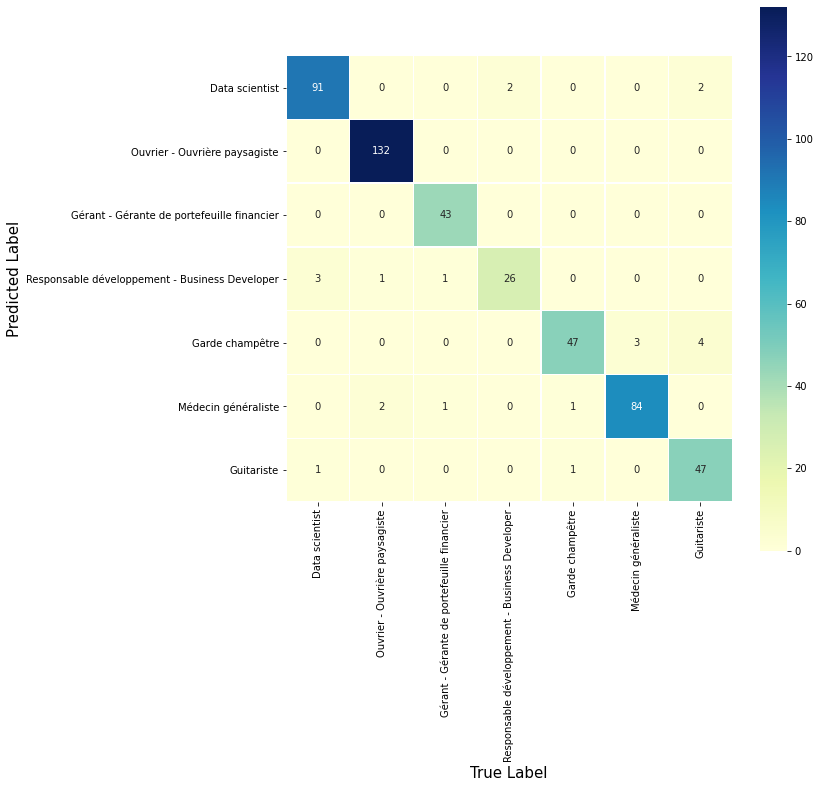

In [0]:
# Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(labels_test, predictions)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(confusion_matrix, 
            linewidths=0.5, cmap="YlGnBu", square=True, 
            xticklabels=jobs_list, yticklabels=jobs_list,
            annot=True, fmt='g')
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

In [0]:
# Principal Component Analysis in Dimension 3
pca = PCA(n_components=3).fit_transform(jobs_embeddings_test)

# DataFrame
df = DataFrame({'Title': [job['title'] for job in jobs_texts_test],
                'Description': [line_jump(job['description'][:1000], 75) for job in jobs_texts_test],
                'Predicted Job Type': [jobs_list[pred] for pred in predictions],
                'Job Type': jobs_types_test,
                'Classification Success': [jobs_list[pred]==job for pred, job in zip(predictions, jobs_types_test)],
                'First PCA Axis': pca[:, 0], 
                'Second PCA Axis': pca[:, 1], 
                'Third PCA Axis': pca[:, 2]})

In [0]:
# Scatter Plot
fig = px.scatter_3d(df, x='First PCA Axis', y='Second PCA Axis', z='Third PCA Axis', 
                    hover_data=['Description', 'Predicted Job Type', 'Job Type', 'Classification Success'],
                    hover_name='Title',
                    color='Predicted Job Type',
                    color_discrete_sequence=px.colors.qualitative.Pastel,
                    symbol='Classification Success',
                    symbol_map={True: "circle", False: "square-open"},
                    width=800, height=800, template='plotly_white')
fig.update(layout_showlegend=False)
fig.update_traces(marker=dict(size=6, line=dict(width=1)))